<a href="https://colab.research.google.com/github/dennis-ancajima/ML-PUCP/blob/main/Estimaci%C3%B3n_de_los_niveles_de_obesidad_ResultadosPropios_Con_IMC_LabelEncoder_12_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import seaborn as sns #Libreria para gráficar
from sklearn.model_selection import cross_val_score
from google.colab import drive

pd.set_option("display.max_columns", 50)

%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#Lectura del dataset
file_name = "ObesityDataSet_raw_and_data_sinthetic.csv"

#El método "read_csv" nos permite leer un excel
dataset = pd.read_csv(file_name)

# 1. Conjunto de datos

Los atributos relacionados con los hábitos alimentarios son:
1. Consumo frecuente de alimentos hipercalóricos (FAVC),
2. Frecuencia de consumo de vegetales (FCVC),
3. Número de comidas principales (NCP),
4. Consumo de alimentos entre comidas (CAEC),
5. Consumo de agua diario (CH20 )
6. Consumo de alcohol (CALC).

Los atributos relacionados con la condición física son:
7. Monitoreo del consumo de calorías (SCC),
8. Frecuencia de actividad física (FAF),
9. Tiempo de uso de dispositivos tecnológicos (TUE),
10. Transporte utilizado (MTRANS),

otras variables obtenidas fueron:
11. Sexo
12. Edad
13. Altura
14. Peso
15. Es Fumador (smoke)
16. Tiene Familiar con sobrepeso (family_history_with_overweight)

Finalmente, todos los datos fueron rotulados y se creó la variable de clase
17. NObesidad con los valores de: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III, con base en la Ecuación (1 )e información de la OMS y la Normatividad Mexicana.

In [ ]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Revisando duplicados
dataset.duplicated().sum()

24

In [ ]:
#Eliminar duplicados
dataset.drop_duplicates(inplace=True)

# Pre- procesamiento de datos

## **Seleccion e ingenieria de caracteristicas**

In [ ]:
dataset['IMC'] = (round((dataset['Weight'] / (dataset['Height']**2)),4))
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.3865
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2382
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.7654
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.8519
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.3424


# Aplicamos LabelEncoder para análisis Feature Extraction with PCA

In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder

cols_categoricas = ['CAEC','CALC','MTRANS','FAVC', 'SMOKE', 'SCC','family_history_with_overweight','Gender','NObeyesdad']

# process columns, apply LabelEncoder to categorical features
for c in cols_categoricas:
    lbl = LabelEncoder()
    # Transformar una variable categórica en valores numéricos
    dataset[c] = lbl.fit_transform(dataset[c]) #dataset[c+'_code'] = lbl.fit_transform(dataset[c]) Para revisar la codificación inverse_transform
# shape
print('Shape all_data: {}'.format(dataset.shape))

Shape all_data: (2087, 18)


In [ ]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.3865
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.2382
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.7654
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.8519
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.3424


# Análisis PCA: Análisis de Componentes Principales

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

Reference: https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization

Observamos la media de las características númericas.

In [ ]:
dataset.mean()

Gender                             0.504073
Age                               24.353090
Height                             1.702674
Weight                            86.858730
family_history_with_overweight     0.825108
FAVC                               0.883565
FCVC                               2.421466
NCP                                2.701179
CAEC                               1.853857
SMOKE                              0.021083
CH2O                               2.004749
SCC                                0.045999
FAF                                1.012812
TUE                                0.663035
CALC                               2.270244
MTRANS                             2.358888
NObeyesdad                         3.014375
IMC                               29.765759
dtype: float64

Observamos la varianza de las características númericas.

In [ ]:
dataset.var()

Gender                              0.250103
Age                                40.561632
Height                              0.008684
Weight                            685.960471
family_history_with_overweight      0.144374
FAVC                                0.102927
FCVC                                0.285943
NCP                                 0.584635
CAEC                                0.211134
SMOKE                               0.020648
CH2O                                0.370010
SCC                                 0.043904
FAF                                 0.728419
TUE                                 0.369850
CALC                                0.267297
MTRANS                              1.601243
NObeyesdad                          3.796533
IMC                                64.399565
dtype: float64

1. Se debe escalar los datos antes de realizar el análisis PCA: media 0 y varianza 1. Así pues, es importante estandarizar las variables con una media de cero y una desviación estándar de 1 antes de realizar PCA. Podemos hacerlo usando la función scale de sklearn:

In [ ]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar el modelo de regresión
X_train_val = dataset.drop(['NObeyesdad'], axis=1)
y_train_val = dataset['NObeyesdad']

In [ ]:
# Dividimos la data en conjunto de "entrenamiento" y "prueba"
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

In [ ]:
#normalization
x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
x_test_N = (X_val-X_val.mean())/(X_val.max()-X_val.min())


Text(0, 0.5, 'explained_variance_ratio_')

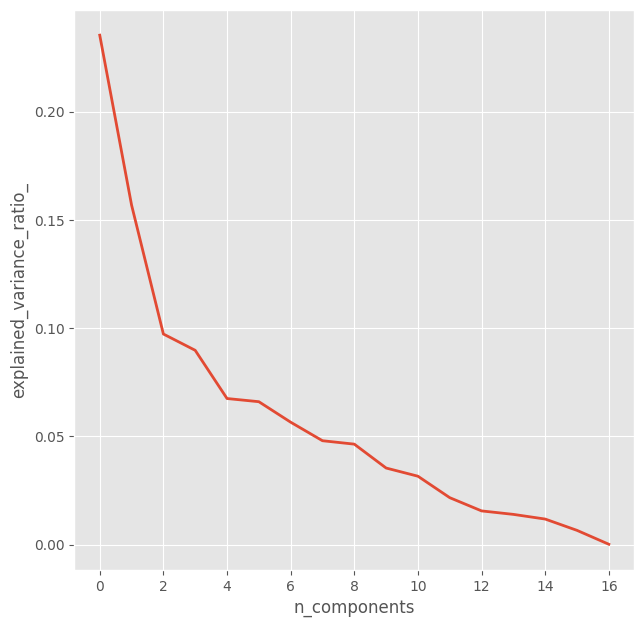

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

# Selección Y Extracción De Características por filtrado

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [ ]:
#X_train_val, y_train_val
X_train_val.shape

(2087, 17)

In [ ]:
filtrado = SelectKBest(mutual_info_classif, k=10).fit(X_train_val, y_train_val)

In [ ]:
filtrado.scores_

array([0.20765321, 0.58841454, 0.42245895, 1.25114242, 0.14225016,
       0.0535904 , 0.39033952, 0.25575363, 0.12582461, 0.00212318,
       0.29073543, 0.04721448, 0.28628615, 0.27316127, 0.13390387,
       0.08033842, 1.82689903])

In [ ]:
print('Score list:', filtrado.scores_)
print('Feature list:', X_train_val.columns)

Score list: [0.20765321 0.58841454 0.42245895 1.25114242 0.14225016 0.0535904
 0.39033952 0.25575363 0.12582461 0.00212318 0.29073543 0.04721448
 0.28628615 0.27316127 0.13390387 0.08033842 1.82689903]
Feature list: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'IMC'],
      dtype='object')


In [ ]:
X_new = filtrado.transform(X_train_val)
X_new[:5]

array([[ 0.    , 21.    ,  1.62  , 64.    ,  2.    ,  3.    ,  2.    ,
         0.    ,  1.    , 24.3865],
       [ 0.    , 21.    ,  1.52  , 56.    ,  3.    ,  3.    ,  3.    ,
         3.    ,  0.    , 24.2382],
       [ 1.    , 23.    ,  1.8   , 77.    ,  2.    ,  3.    ,  2.    ,
         2.    ,  1.    , 23.7654],
       [ 1.    , 27.    ,  1.8   , 87.    ,  3.    ,  3.    ,  2.    ,
         2.    ,  0.    , 26.8519],
       [ 1.    , 22.    ,  1.78  , 89.8   ,  2.    ,  1.    ,  2.    ,
         0.    ,  0.    , 28.3424]])

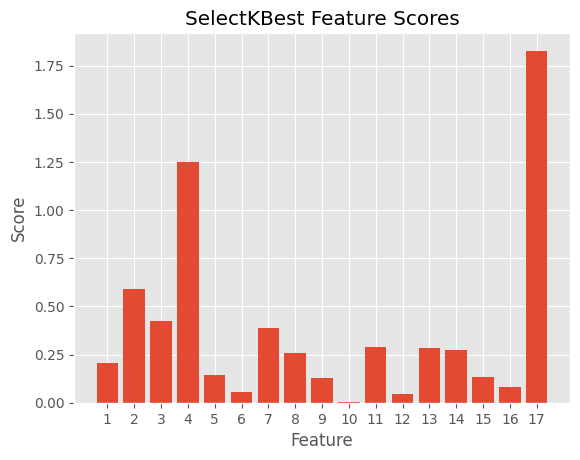

In [ ]:
plt.bar(range(len(filtrado.scores_)), filtrado.scores_)
plt.xticks(range(len(filtrado.scores_)), range(1, len(filtrado.scores_)+1))
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('SelectKBest Feature Scores')
plt.show()

4 características menos importantes: SMOKE, FAVC, SCC, MTRANS

# Selección de características por wrapping - Backward elimination

In [ ]:


import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

KeyboardInterrupt: ignored

# Eliminar 4 características

In [ ]:
dataset.drop(['SMOKE','FAVC','SCC','MTRANS'], axis=1, inplace=True)

In [ ]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,IMC
0,0,21.0,1.62,64.0,1,2.0,3.0,2,2.0,0.0,1.0,3,1,24.3865
1,0,21.0,1.52,56.0,1,3.0,3.0,2,3.0,3.0,0.0,2,1,24.2382
2,1,23.0,1.80,77.0,1,2.0,3.0,2,2.0,2.0,1.0,1,1,23.7654
3,1,27.0,1.80,87.0,0,3.0,3.0,2,2.0,2.0,0.0,1,5,26.8519
4,1,22.0,1.78,89.8,0,2.0,1.0,2,2.0,0.0,0.0,2,6,28.3424


# **12 atributos considerando IMC**

# División de datos de entrenamiento y test

In [ ]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar el modelo de regresión
X_train_val = dataset.drop(['NObeyesdad'], axis=1)
y_train_val = dataset['NObeyesdad']

In [ ]:
# Dividimos la data en conjunto de "entrenamiento" y "prueba"
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=0)

In [ ]:
#12 características
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_val.shape}")

Train shape: (1460, 13)
Test shape: (627, 13)


In [ ]:
#Escalar datos
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train) #Escalar los datos de entrenamiento
X_val_scal = scaler.fit_transform(X_val) #Escalar los datos de prueba

# Ensamble por votación manual

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

estimators = [
     ('Random Forest', make_pipeline(StandardScaler(), RandomForestClassifier(oob_score = True, random_state=42))),
     ('SVM Cubic', make_pipeline(StandardScaler(),svm.SVC(kernel='poly', degree=3,C=10, gamma=50,probability=True))),

     ('árbol de decisión', DecisionTreeClassifier(max_depth=4)),
     ('k-NN', make_pipeline(StandardScaler(),
                            KNeighborsClassifier(n_neighbors=7) )),
     ('SVM de kernel gaussiano', make_pipeline(StandardScaler(),
                                               SVC(kernel='rbf', probability=True) ))
]

ensamble = VotingClassifier(estimators=estimators,
                        voting='soft', weights=[3,2,2, 1, 2])
ensamble.fit(X_train, y_train)

for (name, estimator) in ensamble.named_estimators_.items():
  print(f'Exactitud de {name: <25}: Entrenamiento {estimator.score(X_train, y_train):.03f} || Pruebas {estimator.score(X_val, y_val):.03f}',  )

print(f'Exactitud de {"ensamble": <25}: Entrenamiento {ensamble.score(X_train, y_train):.03f} || Validación {ensamble.score(X_val, y_val):.03f}' )

Exactitud de Random Forest            : Entrenamiento 1.000 || Pruebas 0.955
Exactitud de SVM Cubic                : Entrenamiento 1.000 || Pruebas 0.896
Exactitud de árbol de decisión        : Entrenamiento 0.803 || Pruebas 0.785
Exactitud de k-NN                     : Entrenamiento 0.864 || Pruebas 0.797
Exactitud de SVM de kernel gaussiano  : Entrenamiento 0.950 || Pruebas 0.894
Exactitud de ensamble                 : Entrenamiento 0.996 || Validación 0.941


Train: 70, test:30

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

estimators = [
     ('Random Forest', make_pipeline(StandardScaler(), RandomForestClassifier(oob_score = True, random_state=42))),
     ('SVM Cubic', make_pipeline(StandardScaler(),svm.SVC(kernel='poly', degree=3,C=10, gamma=50,probability=True))),

     ('árbol de decisión', DecisionTreeClassifier(max_depth=4)),

     ('SVM de kernel gaussiano', make_pipeline(StandardScaler(),
                                               SVC(kernel='rbf', probability=True) )),
     ('Redes neuronales', make_pipeline(StandardScaler(),
                                               MLPClassifier(random_state=1, max_iter=300) ))

]

ensamble = VotingClassifier(estimators=estimators,
                        voting='soft', weights=[3,1,1,1,3])
ensamble.fit(X_train, y_train)

for (name, estimator) in ensamble.named_estimators_.items():
  print(f'Exactitud de {name: <25}: Entrenamiento {estimator.score(X_train, y_train):.03f} || Pruebas {estimator.score(X_val, y_val):.03f}',  )

print(f'Exactitud de {"ensamble": <25}: Entrenamiento {ensamble.score(X_train, y_train):.03f} || Validación {ensamble.score(X_val, y_val):.03f}' )

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Exactitud de Random Forest            : Entrenamiento 1.000 || Pruebas 0.990
Exactitud de SVM Cubic                : Entrenamiento 1.000 || Pruebas 0.917
Exactitud de árbol de decisión        : Entrenamiento 0.977 || Pruebas 0.974
Exactitud de SVM de kernel gaussiano  : Entrenamiento 0.962 || Pruebas 0.927
Exactitud de Redes neuronales         : Entrenamiento 0.999 || Pruebas 0.957
Exactitud de ensamble                 : Entrenamiento 1.000 || Validación 0.971


**SVM CUBIC**

**C=10, gamma=50**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Crear una instancia del clasificador SVM con kernel cúbico
model = svm.SVC(kernel='poly', degree=3,C=10, gamma=50)

# Entrenar el clasificador
model.fit(X_train_scal, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_val_scal)

cv = cross_val_score(estimator = model, X = X_train_scal, y = y_train, cv = 10) #metodo para obtener la precisión
cvForest = cv.mean()
stdForest = cv.std()


print("promedio Validación cruzada k=10: ", cvForest)
print('Varianza de Random Forest: ',stdForest)
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % model.score(X_train_scal, y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % model.score(X_val_scal, y_val))

Para determinar valores C y γ que brinden una mejor generalización, es necesario probar con diferentes valores, ajustando el modelo en el conjunto de entrenamiento y probando su desempeño en el conjunto de validación.

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

Cs = np.logspace(-2,2,9)  # ~ [0.01, 0.03, 0.1, ..., 100]
gammas = np.logspace(-4,4,9)  # [0.0001, 0.001, ..., 10000]

mejor_modelo = None
mejor_score = 0
for C in Cs:
    for gamma in gammas:

        model = svm.SVC(kernel='poly', degree=3, C=C, gamma=gamma)
        model.fit(X_train_scal, y_train)

        score_val = model.score(X_val_scal, y_val)

        if score_val > mejor_score:
            mejor_score = score_val
            mejor_modelo = model


cv = cross_val_score(estimator = mejor_modelo, X = X_train_scal, y = y_train, cv = 10) #metodo para obtener la precisión
cvForest = cv.mean()

print ('Mejor valor de C: %0.4f' % mejor_modelo.get_params()['C'])
print ('Mejor valor de gamma: %0.4f' % mejor_modelo.get_params()['gamma'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % mejor_modelo.score(X_train_scal, y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % mejor_modelo.score(X_val_scal, y_val))
print("promedio Validación cruzada k=10: ", cvForest)


**RandomForest con data escalada: OOB (Bagging)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(oob_score = True,random_state=42)
rf.fit(X_train_scal, y_train)

y_pred = rf.predict(X_val_scal) #Hacemos predicciones sobre el conjunto de test

cv = cross_val_score(estimator = rf, X = X_train_scal, y = y_train, cv = 10) #metodo para obtener la precisión
cvForest = cv.mean()
stdForest = cv.std()
print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train_scal, y_train))
print('Exactitud del modelo inicial en entrenamiento (Out of Bag):', rf.oob_score_)
print('Exactitud del modelo inicial en validación:', rf.score(X_val_scal, y_val))
print("promedio Validación cruzada Random Forest: ", cvForest)
print('Varianza de Random Forest: ',stdForest)

Exactitud del modelo inicial en entrenamiento: 1.0
Exactitud del modelo inicial en entrenamiento (Out of Bag): 0.947190250507786
Exactitud del modelo inicial en validación: 0.8675078864353313
promedio Validación cruzada Random Forest:  0.9492645706931422
Varianza de Random Forest:  0.020932661299248784


# Matriz de confusión

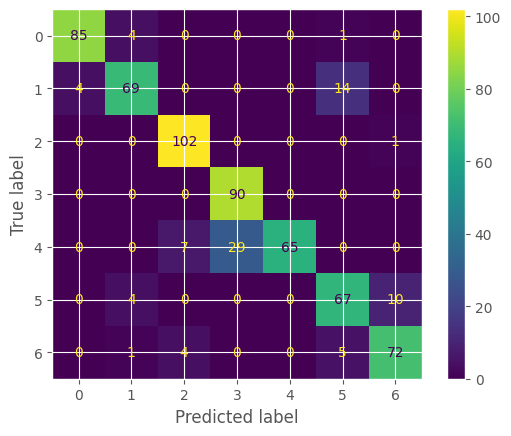

In [ ]:
cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

# Importancia de la características

<ipython-input-40-90623505696b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


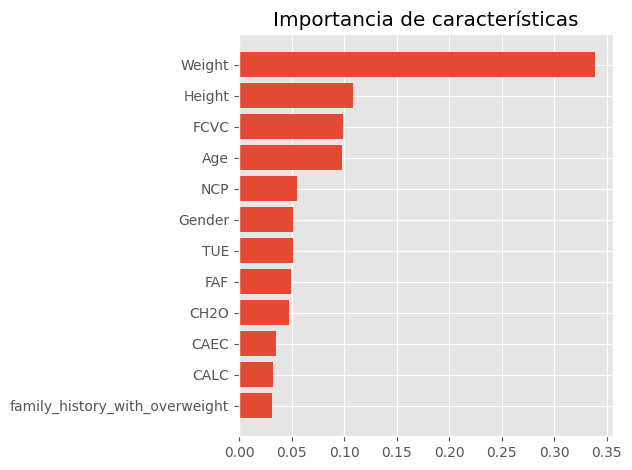

In [ ]:
feature_names = X_train_val.columns.values
tree_feature_importances = rf.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Importancia de características")
fig.tight_layout()
plt.show()

** Estrategia De Validación A Emplear Para El Ajuste De Hiperparámetros.**

Los principales hiperparámetros de Random Forest son:

n_estimators -- el número de modelos base (árboles) a entrenar
max_features -- el número de características a considerar en cada partición de los árboles
max_depth -- la profundidad máxima de los árboles
min_samples_leaf -- el numero mínimo de muestras que deben quedar en cada hoja del árbol
Para identificar los mejores valores de los hiperparámetros usaremos primero búsqueda aleatoria y luego búsqueda en grilla.

In [ ]:
from pprint import pprint
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 8, 10, 12, None]  # 'auto' equivale a 'sqrt'; None equivale a todas las 15
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] + [None]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar',
      len(random_grid['n_estimators']) *
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['min_samples_leaf']),
      'modelos'
      )

Los valores a probar en la búsqueda aleatoria son:
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 8, 10, 12, None],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Si se probara todas las combinaciones se requeriría entrenar 1800 modelos


Probaremos entrenando sólo un 1% de las combinaciones posibles, es decir, 18. (Se recomienda probar al menos un 10%)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(oob_score=True)
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 18,
                               cv = 10,          # Validación cruzada 10-fold
                               verbose=2,
                               random_state=0,
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
rf_random.fit(X_train_scal, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [ ]:
rf_random_best = rf_random.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_random.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', rf_random_best.score(X_train_scal, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', rf_random_best.oob_score_)
print('Exactitud luego de búsqueda aleatoria en validación:', rf_random_best.score(X_val_scal, y_val))